In [18]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [19]:
df=pd.read_csv("CombinedcleanedOdiStats.csv")
df

,PlayerName,Matches,Innings,Average,StrikeRate,HighestScore,4s,6s,50s,100s,Runs,Gender
0,Sachin Tendulkar,463,452,44.83,86.23,200,2016.0,195.0,96,49,18426,Men
1,Virat Kohli,305,293,57.71,93.26,183,1332.0,152.0,75,51,14255,Men
2,Rohit Sharma,276,268,49.22,92.66,264,1066.0,349.0,59,33,11370,Men
3,Sourav Ganguly,311,300,41.02,73.70,183,1122.0,190.0,72,22,11363,Men
4,Rahul Dravid,344,318,39.16,71.23,153,950.0,42.0,83,12,10889,Men
...,...,...,...,...,...,...,...,...,...,...,...,...
366,Bindeshwari Goyal,4,1,0.00,25.00,1,NaN,NaN,0,0,1,Women
367,Samantha Lobatto,3,2,0.00,12.50,1,NaN,NaN,0,0,1,Women
368,Anjali Sharma,3,3,0.33,NaN,1,NaN,NaN,0,0,1,Women
369,Rita Patel,1,1,1.00,NaN,1,NaN,NaN,0,0,1,Women


In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 371 entries, 0 to 370
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PlayerName    371 non-null    object 
 1   Matches       371 non-null    int64  
 2   Innings       371 non-null    int64  
 3   Average       371 non-null    float64
 4   StrikeRate    322 non-null    float64
 5   HighestScore  371 non-null    int64  
 6   4s            254 non-null    float64
 7   6s            154 non-null    float64
 8   50s           371 non-null    int64  
 9   100s          371 non-null    int64  
 10  Runs          371 non-null    int64  
 11  Gender        371 non-null    object 
dtypes: float64(4), int64(6), object(2)
memory usage: 34.9+ KB


## 1.)Total number of matches played (caps) by all players

In [21]:
# Total number of matches played (caps) by all players
total_caps = df['Matches'].sum()
print("Total number of caps (matches played) for India:", total_caps)

# Total number of men and women caps
men_caps = df[df['Gender'] == 'Men']['Matches'].sum()
women_caps = df[df['Gender'] == 'Women']['Matches'].sum()

print("Total number of Men caps for India:", men_caps)
print("Total number of Women caps for India:", women_caps)


Total number of caps (matches played) for India: 15313
Total number of Men caps for India: 11598
Total number of Women caps for India: 3715


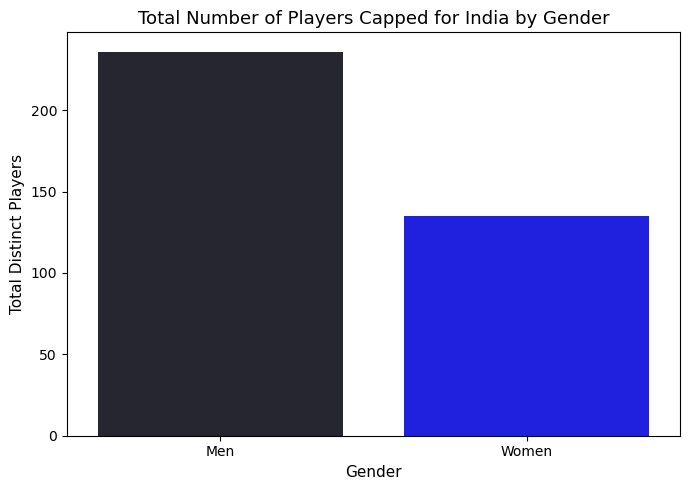

In [22]:
# Calculate distinct player counts by gender
players_by_gender = df.groupby('Gender')['PlayerName'].nunique().reset_index()
players_by_gender.columns = ['Gender', 'Total_Players']

# Visualization
plt.figure(figsize=(7,5))
sns.barplot(
    data=players_by_gender,
    x='Gender',
    y='Total_Players',
    hue='Gender',
    palette='dark:blue',
    legend=False
)

plt.title('Total Number of Players Capped for India by Gender', fontsize=13)
plt.xlabel('Gender', fontsize=11)
plt.ylabel('Total Distinct Players', fontsize=11)
plt.tight_layout()
plt.show()

### 2.)Top 25 batsmen based on Runs Scored.

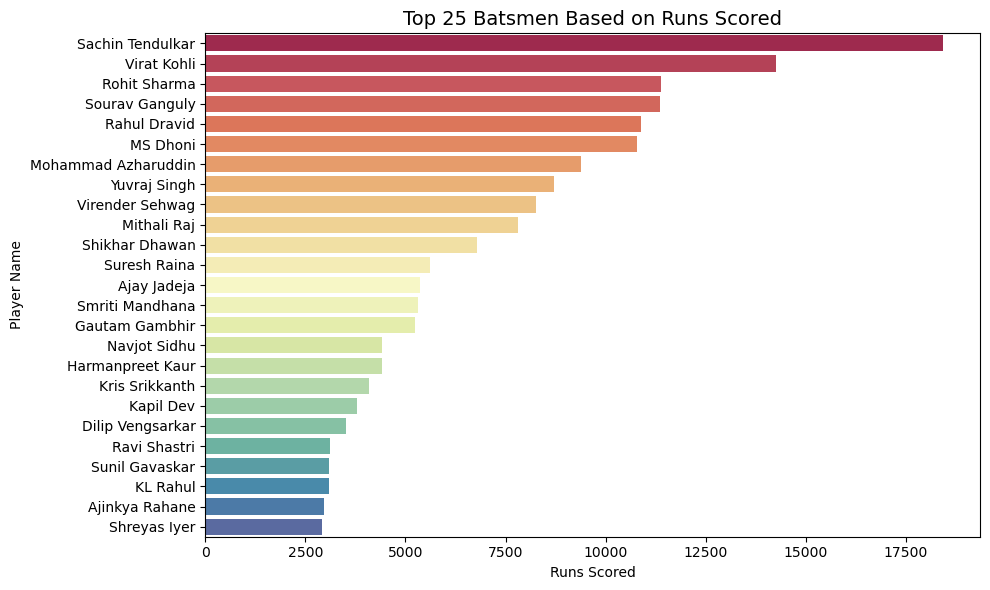

In [23]:
import seaborn as sns
import matplotlib.pyplot as plt

top_25 = df.sort_values(by='Runs', ascending=False).head(25)

plt.figure(figsize=(10,6))
sns.barplot(
    x='Runs',
    y='PlayerName',
    data=top_25,
    hue='PlayerName',
    palette='Spectral',
    dodge=False,
    legend=False
)

plt.title('Top 25 Batsmen Based on Runs Scored', fontsize=14)
plt.xlabel('Runs Scored')
plt.ylabel('Player Name')
plt.tight_layout()
plt.show()


### 3.)Top 25 Batsmen With Highest Batting Averages

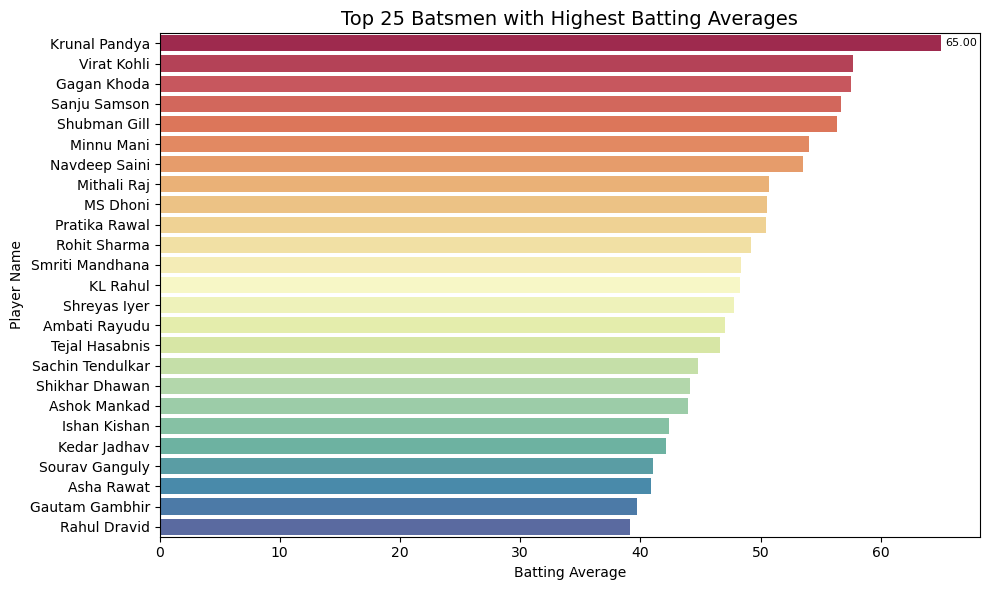

In [24]:
# Sort by Average
top_25_avg = df.sort_values(by='Average', ascending=False).head(25)

plt.figure(figsize=(10,6))
ax = sns.barplot(
    x='Average',
    y='PlayerName',
    data=top_25_avg,
    hue='PlayerName',        # to avoid FutureWarning
    palette='Spectral',
    dodge=False,
    legend=False
)

ax.bar_label(ax.containers[0], fontsize=8, padding=3, fmt='%.2f')

# Titles and labels
plt.title('Top 25 Batsmen with Highest Batting Averages', fontsize=14)
plt.xlabel('Batting Average')
plt.ylabel('Player Name')

plt.tight_layout()
plt.show()

### 4.)Top 25 Batsmen with Highest Strike Rate (Min 25 Innings)

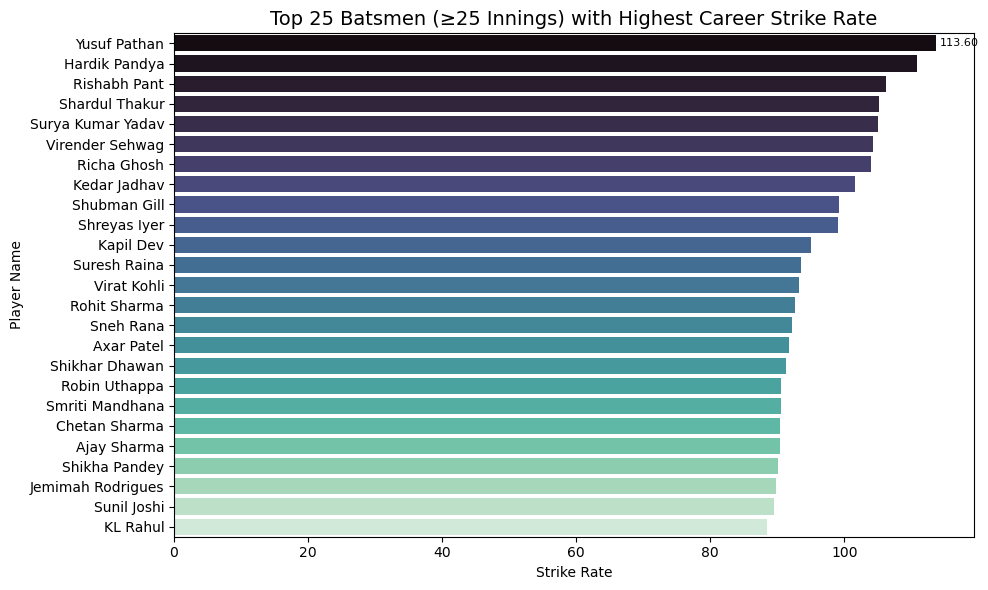

In [25]:
# Step 1: Filter players who played at least 25 innings
qualified_players = df[df['Innings'] >= 25]

# Step 2: Sort by Strike Rate in descending order and select top 25
top_25_sr = qualified_players.sort_values(by='StrikeRate', ascending=False).head(25)

# Step 3: Create the bar plot
plt.figure(figsize=(10,6))
ax = sns.barplot(
    x='StrikeRate',
    y='PlayerName',
    data=top_25_sr,
    hue='PlayerName', 
    palette='mako',          
    dodge=False,
    legend=False
)

# Step 4: 
ax.bar_label(ax.containers[0], fontsize=8, padding=3, fmt='%.2f')

# Step 5: Add titles and axis labels
plt.title('Top 25 Batsmen (≥25 Innings) with Highest Career Strike Rate', fontsize=14)
plt.xlabel('Strike Rate')
plt.ylabel('Player Name')

# Step 6: Adjust layout and display
plt.tight_layout()
plt.show()

## 5.)Top 10 players by 100s

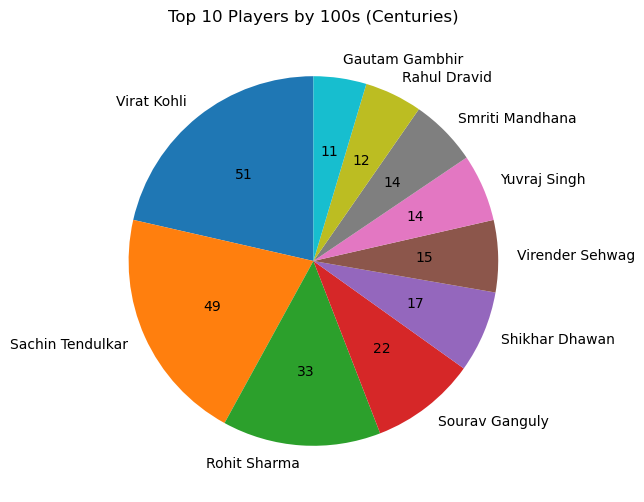

In [26]:
import matplotlib.pyplot as plt

# Top 10 players by 100s
top_100s = df.sort_values(by='100s', ascending=False).head(10)

plt.figure(figsize=(6,6))
wedges, texts, autotexts = plt.pie(
    top_100s['100s'],
    labels=top_100s['PlayerName'],
    startangle=90,
    autopct='%1.0f'
)

# Replace % values with actual number of 100s
for i, a in enumerate(autotexts):
    a.set_text(int(top_100s['100s'].iloc[i]))

plt.title('Top 10 Players by 100s (Centuries)')
plt.show()


## 6.)Top 10 players by 50s

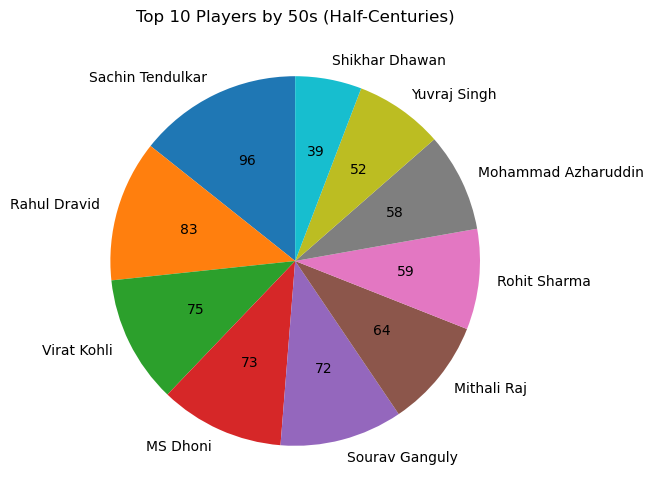

In [27]:
import matplotlib.pyplot as plt

# Top 10 players by 50s
top_50s = df.sort_values(by='50s', ascending=False).head(10)

plt.figure(figsize=(6,6))
wedges, texts, autotexts = plt.pie(
    top_50s['50s'],
    labels=top_50s['PlayerName'],
    startangle=90,
    autopct='%1.0f'
)

# Replace % values with actual number of 50s
for i, a in enumerate(autotexts):
    a.set_text(int(top_50s['50s'].iloc[i]))

plt.title('Top 10 Players by 50s (Half-Centuries)')
plt.show()

## 7.)Top 10 Players by 4s (Boundaries)

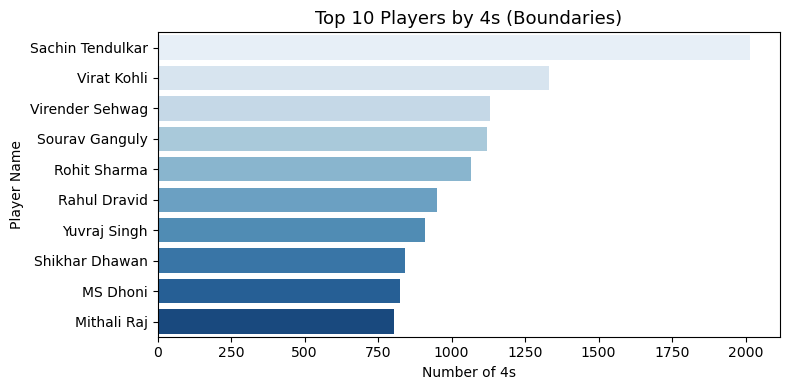

In [28]:
top_4s = df.sort_values(by='4s', ascending=False).head(10)

plt.figure(figsize=(8,4))
sns.barplot(
    x='4s',
    y='PlayerName',
    data=top_4s,
    hue='PlayerName',  
    palette='Blues',
    dodge=False,
    legend=False
)
plt.title('Top 10 Players by 4s (Boundaries)', fontsize=13)
plt.xlabel('Number of 4s')
plt.ylabel('Player Name')
plt.tight_layout()
plt.show()

## 8.)Top 10 Players by 6s (Sixes)

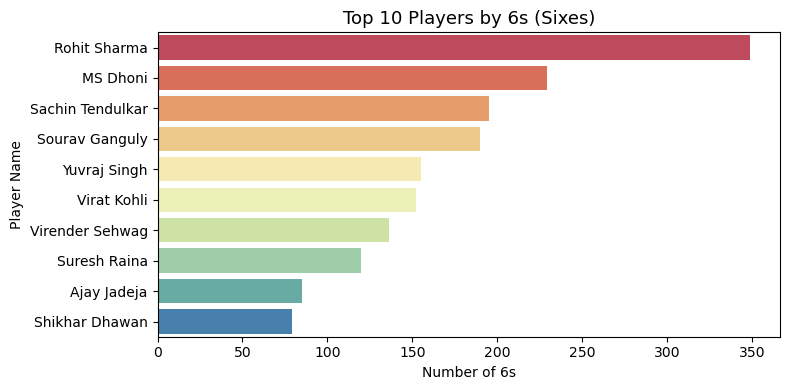

In [29]:
# Top 10 players by 6s
top_6s = df.sort_values(by='6s', ascending=False).head(10)

plt.figure(figsize=(8,4))
sns.barplot(
    x='6s',
    y='PlayerName',
    data=top_6s,
    hue='PlayerName',        
    palette='Spectral',         
    dodge=False,
    legend=False
)

plt.title('Top 10 Players by 6s (Sixes)', fontsize=13)
plt.xlabel('Number of 6s')
plt.ylabel('Player Name')
plt.tight_layout()
plt.show()

### 9.)Top 10 PlayerNames with Highest Individual Scores in ODI Cricket

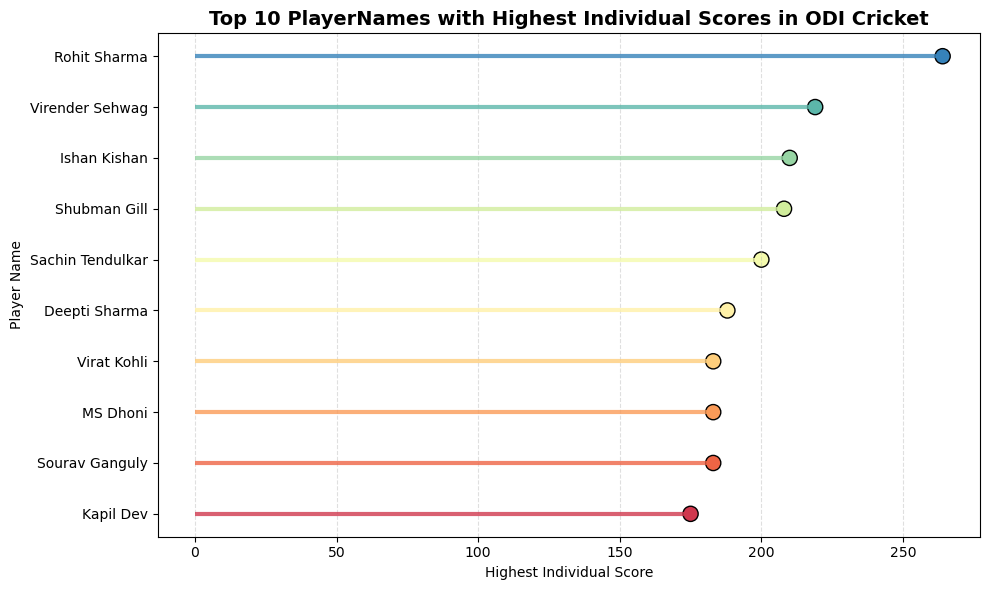

In [30]:
# Sort dataset by Highest Score in descending order
top_highest = df.sort_values(by='HighestScore', ascending=False).head(10)

# Reverse order for plotting (so highest score appears at top)
top_highest = top_highest[::-1]

# Color palette (distinct colors)
colors = sns.color_palette('Spectral', n_colors=10)

# Create figure
plt.figure(figsize=(10,6))
plt.hlines(y=top_highest['PlayerName'], xmin=0, xmax=top_highest['HighestScore'],
            color=colors, alpha=0.8, linewidth=3)
plt.scatter(top_highest['HighestScore'], top_highest['PlayerName'],
            color=colors, s=120, edgecolor='black', linewidth=1)

# Titles and labels
plt.title('Top 10 PlayerNames with Highest Individual Scores in ODI Cricket', fontsize=14, weight='bold')
plt.xlabel('Highest Individual Score')
plt.ylabel('Player Name')

# Add score labels beside points
#for score, name in zip(top_highest['HighestScore'], top_highest['PlayerName']):
    #plt.text(score + 2, name, f'{int(score)}', va='center', fontsize=10, fontweight='bold')

# Style & layout
plt.grid(axis='x', linestyle='--', alpha=0.4)
plt.tight_layout()
plt.show()

In [31]:
# how to read this graph
#The range is divided into bins (intervals) — for example:
#0–20, 20–40, 40–60, etc.
#Each bin shows a range of sixes.

## 10.)Distribution of Batting Average by Gender

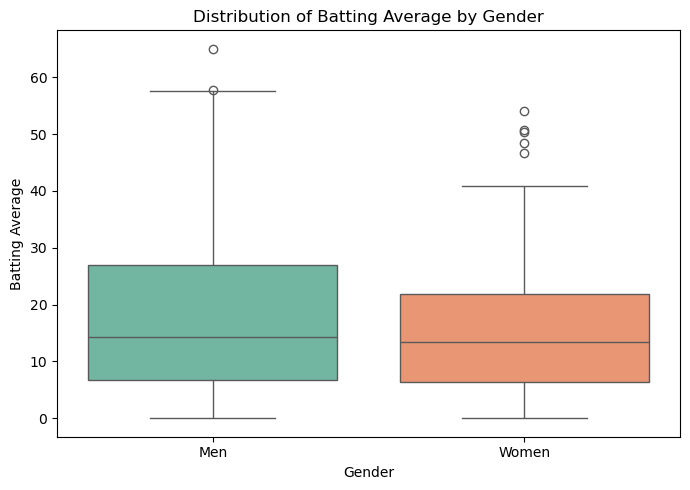

In [32]:
plt.figure(figsize=(7,5))
sns.boxplot(
    x='Gender',
    y='Average',
    data=df,
    hue='Gender',
    palette='Set2',
    legend=False
)
plt.title('Distribution of Batting Average by Gender')
plt.xlabel('Gender')
plt.ylabel('Batting Average')
plt.tight_layout()
plt.show()

## 11.)Average Runs Scored by Gender

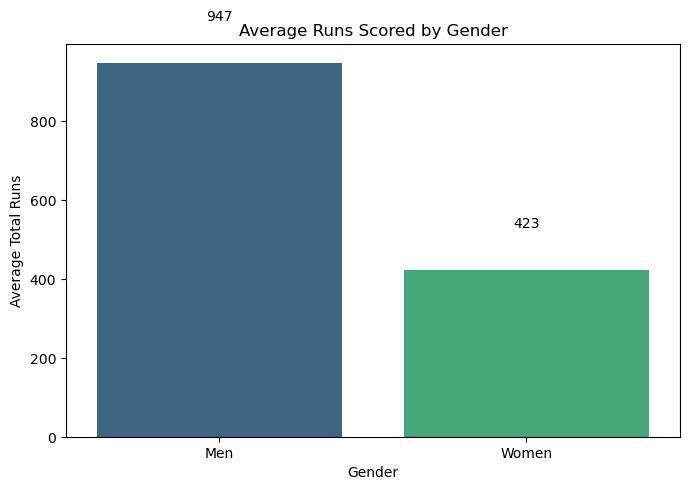

In [33]:
# Calculate average runs per gender
runs_by_gender = df.groupby('Gender')['Runs'].mean().reset_index()
plt.figure(figsize=(7,5))
sns.barplot(
    data=runs_by_gender,
    x='Gender',
    y='Runs',
    hue='Gender',   
    palette='viridis',
    legend=False
)
plt.title('Average Runs Scored by Gender')
plt.xlabel('Gender')
plt.ylabel('Average Total Runs')
for index, value in enumerate(runs_by_gender['Runs']):
    plt.text(index, value + 100, f"{value:.0f}", ha='center', va='bottom')
plt.tight_layout()
plt.show()